In [ ]:
pip install matplotlib

In [ ]:
pip install numpy

In [ ]:
pip install pandas

In [ ]:
pip install seaborn

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

1. Работа с таблицей

1.1 Чтение таблицы

In [2]:
data = pd.read_csv('hgnc_complete_set.tsv', sep='\t')
data.head()

/scratch/ipykernel_2107152/2079383006.py:1: DtypeWarning: Columns (32,34,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('hgnc_complete_set.tsv', sep='\t')


,hgnc_id,symbol,name,locus_group,locus_type,status,location,location_sortable,alias_symbol,alias_name,...,merops,imgt,iuphar,kznf_gene_catalog,mamit-trnadb,cd,lncrnadb,enzyme_id,intermediate_filament_db,rna_central_ids
0,HGNC:5,A1BG,alpha-1-B glycoprotein,protein-coding gene,gene with protein product,Approved,19q13.43,19q13.43,NaN,NaN,...,I43.950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HGNC:37133,A1BG-AS1,A1BG antisense RNA 1,non-coding RNA,"RNA, long non-coding",Approved,19q13.43,19q13.43,FLJ23569,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,URS00007E4F6E
2,HGNC:24086,A1CF,APOBEC1 complementation factor,protein-coding gene,gene with protein product,Approved,10q11.23,10q11.23,ACF|ASP|ACF64|ACF65|APOBEC1CF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HGNC:7,A2M,alpha-2-macroglobulin,protein-coding gene,gene with protein product,Approved,12p13.31,12p13.31,FWP007|S863-7|CPAMD5,NaN,...,I39.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HGNC:27057,A2M-AS1,A2M antisense RNA 1 (head to head),non-coding RNA,"RNA, long non-coding",Approved,12p13.31,12p13.31,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,URS00001F234A


1.2 Построение графика

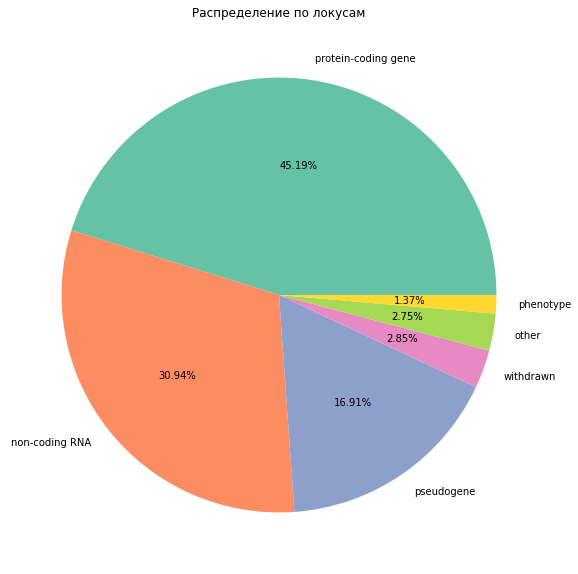

In [3]:
fig = plt.figure(figsize = (10, 10))
counts = data['locus_group'].value_counts()
plt.pie(counts, labels = data['locus_group'].unique(), autopct='%1.2f%%', colors=sns.color_palette('Set2'))
plt.title('Распределение по локусам')
plt.savefig('plot.png')

2. Картинка

Приведем построенный ранее график. 

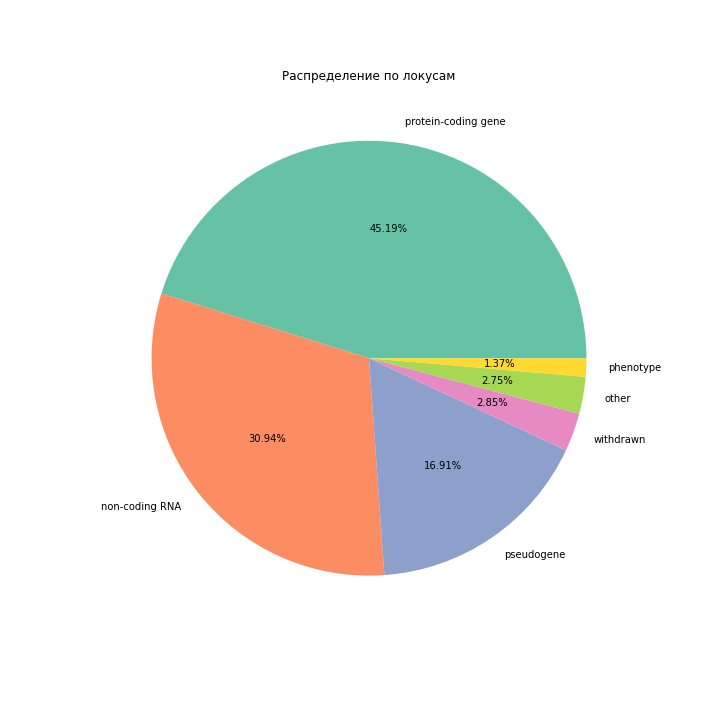

3. R и ggplot2

Установим необходимые пакеты и передедим датасет в R. 

In [4]:
pip install rpy2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
import rpy2
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri

pandas2ri.activate()
data_r = ro.conversion.py2rpy(data)

In [22]:
%load_ext rpy2.ipython
data_r = ro.conversion.py2rpy(data)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


hgnc_id,symbol,name,...,enzyme_id,intermediate_filament_db,rna_central_ids
...,...,...,...,...,...,...


In [23]:
%%R
install.packages("ggplot2")
library(ggplot2)

* installing *source* package ‘ggplot2’ ...
** package ‘ggplot2’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (ggplot2)


Installing package into ‘/home/aprokofeva/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/ggplot2_3.5.1.tar.gz'
Content type 'application/x-gzip' length 3604371 bytes (3.4 MB)
downloaded 3.4 MB


The downloaded source packages are in
	‘/scratch/Rtmpdh0NC8/downloaded_packages’


Построим график

In [24]:
%%R
graph <- ggplot(data_r, aes(locus_group)) + geom_freqpoly()
png("plot_r.png") 
print(graph) 
dev.off() 

Error in ggplot(data_r, aes(locus_group)) : object 'data_r' not found


RInterpreterError: Failed to parse and evaluate line 'graph <- ggplot(data_r, aes(locus_group)) + geom_freqpoly()\npng("plot_r.png") \nprint(graph) \ndev.off() \n'.
R error message: "Error in ggplot(data_r, aes(locus_group)) : object 'data_r' not found"